In [1]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Вспомогательные функции
def count_percent(df, col):
    filled = df[col].fillna('Unknown')
    counts = filled.value_counts()
    perc = (counts / counts.sum() * 100).round(1)
    return pd.DataFrame({'Количество': counts, 'Процент, %': perc})

In [128]:
# График count plot
def plot_count(data, column, title=None, hue=None, xlabel=None, ylabel='Количество', order=None, xlabelrotation=False, legend=False):
    if hue is None:
        hue = column
    if title is None:
        title = f'Распределение {column}'
    if xlabel is None:
        xlabel = column
    sns.countplot(x=column, data=data, order=order, hue=hue)
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    if xlabelrotation:
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# Разведочный анализ данных (EDA)
## Общая информация по данным

In [110]:
# Загрузка данных
data_train = pd.read_csv('../data/interactions_train.csv', sep=',')
data_items = pd.read_csv('../data/items.csv', sep=',')
data_users = pd.read_csv('../data/users.csv', sep=',')
data_test = pd.read_csv('../data/interactions_public_test.csv', sep=',')

In [111]:
# Объединение файлов
data = (
    data_train
    .merge(data_users, on='user_id', how='left')
    .merge(data_items, on='item_id', how='left')
)

In [112]:
data.head().T

,0,1,2,3,4
user_id,3,3,3,3,4
item_id,10139,7204,12928,3897,811
last_watch_dt,2021-04-25,2021-07-17,2021-08-17,2021-08-17,2021-06-12
total_dur,103.0,28.0,845.0,901.0,6191.0
watched_pct,2.0,1.0,15.0,15.0,100.0
age,age_35_44,age_35_44,age_35_44,age_35_44,NaN
income,income_20_40,income_20_40,income_20_40,income_20_40,NaN
sex,Ж,Ж,Ж,Ж,NaN
kids_flg,1.0,1.0,1.0,1.0,NaN
content_type,film,film,film,film,film


In [113]:
data.shape

(922967, 21)

Размерность около 923 тысяч строк, 21 признак.

In [114]:
# Вывод информации о типах признаков
data.dtypes

user_id            int64
item_id            int64
last_watch_dt     object
total_dur        float64
watched_pct      float64
age               object
income            object
sex               object
kids_flg         float64
content_type      object
title             object
title_orig        object
release_year     float64
genres            object
countries         object
for_kids         float64
age_rating       float64
studios           object
directors         object
actors            object
keywords          object
dtype: object

In [115]:
# Проверка на пустые значения
data.isnull().sum()

user_id               0
item_id               0
last_watch_dt         0
total_dur             1
watched_pct         185
age              178846
income           178537
sex              178941
kids_flg         168510
content_type          0
title                 0
title_orig        63785
release_year         66
genres                0
countries            39
for_kids         902894
age_rating            0
studios          915248
directors          8651
actors            27356
keywords          38082
dtype: int64

In [116]:
# Проверка на дубликаты
data.duplicated().sum()

np.int64(0)

In [117]:
# Просмотр уникальных значений
data.nunique()

user_id          284999
item_id           11856
last_watch_dt       163
total_dur         60075
watched_pct         101
age                   6
income                6
sex                   2
kids_flg              2
content_type          2
title             11403
title_orig         8616
release_year        103
genres             2247
countries           631
for_kids              2
age_rating            6
studios              36
directors          6498
actors             9897
keywords          11408
dtype: int64

## 1. Признаки пользователей
- user_id - уникальный идентификатор пользователя
- age - возраст пользователя
- income - доход
- sex - пол
- kids_flg - флаг детского профиля

### Распределение пользователей по возрасту
**Цель:** Проанализировать распределение пользователей по возрасту, выявление преобладающих возрастных групп.

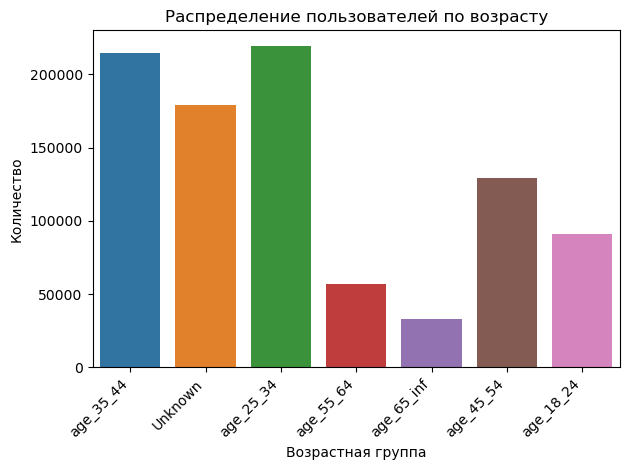

In [130]:
data['age'] = data['age'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'age', title='Распределение пользователей по возрасту', xlabel='Возрастная группа', xlabelrotation=True)

In [123]:
age_df = count_percent(data, 'age')
age_df

,Количество,"Процент, %"
age,,
age_25_34,219175,23.7
age_35_44,214491,23.2
Unknown,178846,19.4
age_45_54,129407,14.0
age_18_24,91102,9.9
age_55_64,56934,6.2
age_65_inf,33012,3.6


***Вывод:*** 
- Наибольшие группы пользователей от **25 до 34 - 29.5%** и от **35 до 44 - 28.8%**.
- Наименьшие группы от **55 до 64 лет - 7.7%** и **выше 65 лет - 4.4%**.
- Пропущено около **20%** возрастов пользователей.

### Распределение пользователей по полу
**Цель:** Проанализировать распределение пользователей по полу, выявление преобладающего по количеству пола.

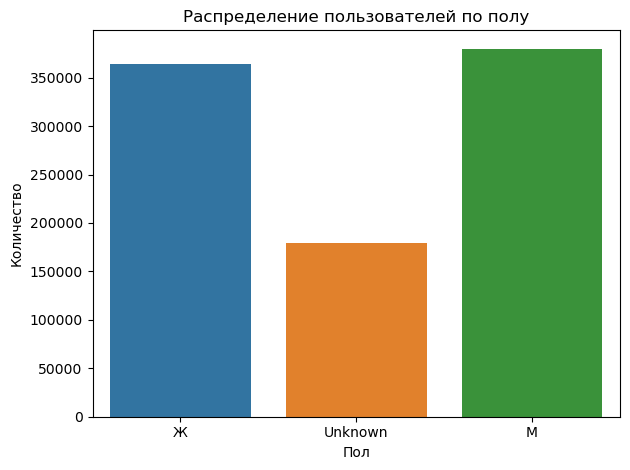

In [131]:
data['sex'] = data['sex'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'sex', title='Распределение пользователей по полу', xlabel='Пол')

In [124]:
# Подсчет процентного соотношения пользователей в зависимости от пола.
sex_df = count_percent(data, 'sex')
sex_df

,Количество,"Процент, %"
sex,,
М,379890,41.2
Ж,364136,39.5
Unknown,178941,19.4


***Вывод:*** 
- В целом пользователи распределены по ровну по полу, **41.2% мужчины** и **39.5% женщины** соответственно.
- Около **19.4%** данных о поле пользователей неизвестно.

### Соотношение детей.
**Цель:** Выяснить процентное соотношение пользователей с детским профилем к общему числу пользователей.

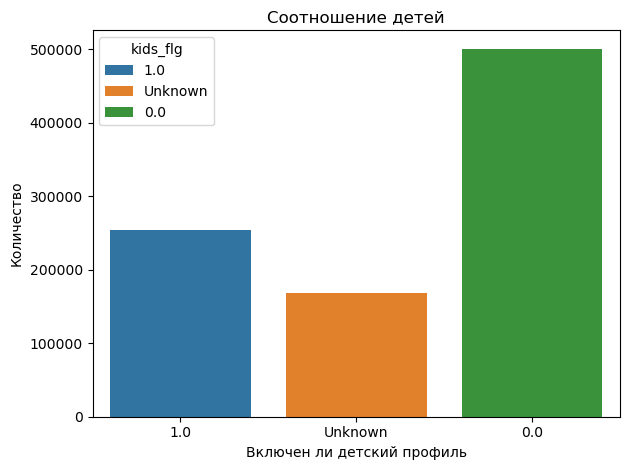

In [136]:
data['kids_flg'] = data['kids_flg'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'kids_flg', title='Соотношение детей', xlabel='Включен ли детский профиль', xlabelrotation=False)

In [137]:
# Подсчет процентного соотношения пользователей с детским профилем к общему числу пользователей.
kids_df = count_percent(data, 'kids_flg')
kids_df

,Количество,"Процент, %"
kids_flg,,
0.0,500469,54.2
1.0,253988,27.5
Unknown,168510,18.3


***Вывод:*** 
- У **27.5%** пользователей включен детский профиль.
- Для **18.3%** данные неизвестны.

### Распределение пользователей в зависимости от дохода.
**Цель:** Выяснить соотношение пользователей с различным уровнем дохода.

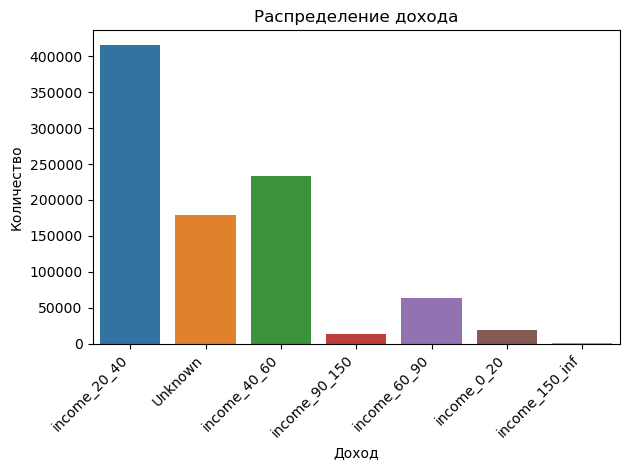

In [139]:
data['income'] = data['income'].fillna('Unknown')  # Выделение пропущенных значений в отдельную группу.
plot_count(data, 'income', title='Распределение дохода', xlabel='Доход', xlabelrotation=True)

In [143]:
# Подсчет процентного соотношения пользователей с различным уровнем дохода.
income_df = count_percent(data, 'income')
income_df

,Количество,"Процент, %"
income,,
income_20_40,415339,45.0
income_40_60,232944,25.2
Unknown,178537,19.3
income_60_90,62827,6.8
income_0_20,19529,2.1
income_90_150,12842,1.4
income_150_inf,949,0.1


***Вывод:*** 
- Наибольшее кол-во пользователей имеют доход **от 20 до 40** тысяч в месяц, что равняется **45%**.
- Минимальное кол-во пользователей обладают доходом от **90 до 150 (1.4%)** и выше **150 (0.1%)** тысяч соответственно.
- Для **19.3%** данные неизвестны.

## 2. Признаки видеоконтента
- item_id - уникальный идентификатор видео
- content_type - тип контента
- title - название видео
- title_orig - ссылка на оригинальное видео
- release_year - год создания видео
- genres - жанры
- countries - страна(ы), где создали видео
- for_kids - детский контент
- age_rating - возрастной рейтинг
- studios - студия, где снималось видео
- directors - режиссер видео
- actors - актеры
- keywords - ключевые слова

### Распределение видео в зависимости от типа контента.
**Цель:** Выяснить распределение видео по типу.

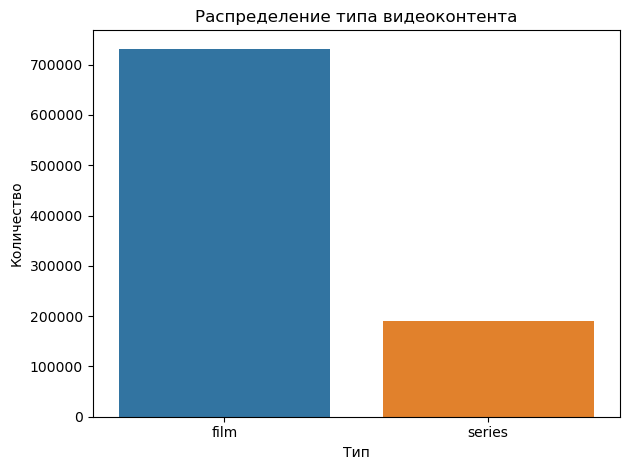

In [146]:
plot_count(data, 'content_type', title='Распределение типа видеоконтента', xlabel='Тип')

In [144]:
# Подсчет процентного соотношения типов контента.
income_df = count_percent(data, 'content_type')
income_df

,Количество,"Процент, %"
content_type,,
film,731723,79.3
series,191244,20.7


***Вывод:*** 
- **79.3%** контента это фильм.
- **20.7%** контента сериал.

### Количество видео по годам выпуска (последние 30 лет)
**Цель:** Выяснить распределение видеоконтента за последние 30 лет.

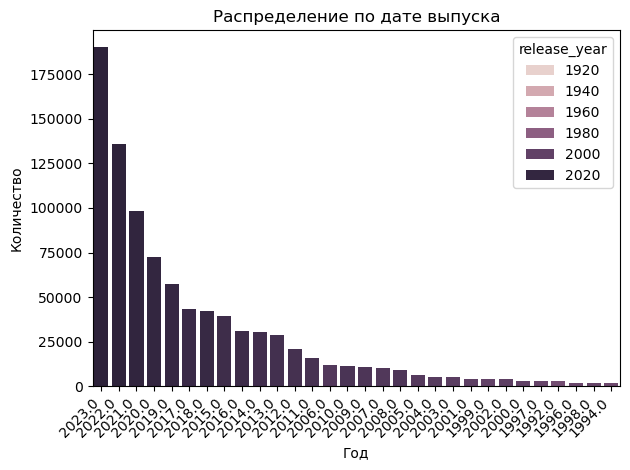

In [154]:
plot_count(data, 'release_year', title='Распределение по дате выпуска', xlabel='Год', xlabelrotation=True, order=data['release_year'].value_counts().index[:30])

In [158]:
# Подсчет процентного соотношения типов контента.
release_df = count_percent(data, 'release_year')
release_df.head(20)

,Количество,"Процент, %"
release_year,,
2023.0,190074,20.6
2022.0,135706,14.7
2021.0,98511,10.7
2020.0,72400,7.8
2019.0,57234,6.2
2017.0,43188,4.7
2018.0,42056,4.6
2015.0,39166,4.2
2016.0,30827,3.3
